In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

data = fetch_openml('mnist_784', version=1) # Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
y = dfData['target'].values
X = dfData[data["feature_names"]].astype(float).values
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

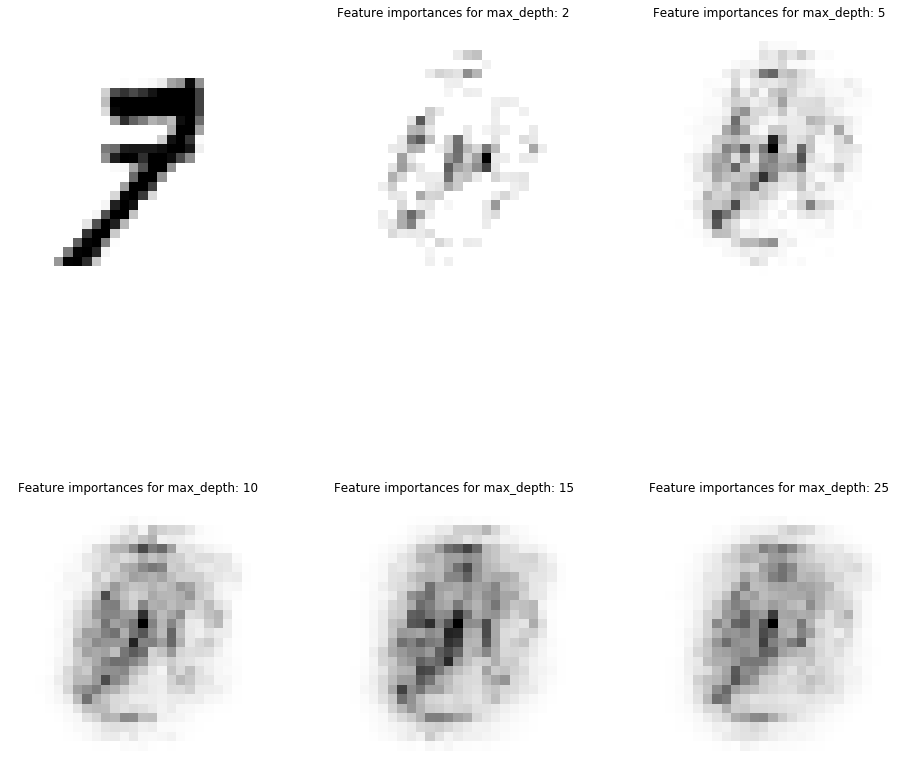

In [2]:
from sklearn.ensemble import RandomForestClassifier

max_depths = [2,5,10,15,25]
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(2,3,1)
plt.imshow(X_train[0].reshape(28,28),cmap=plt.get_cmap('gray_r'))
plt.axis('off')
for md in max_depths:
    ax = fig.add_subplot(2,3,max_depths.index(md)+2)
    scores = cross_validate(RandomForestClassifier(max_depth=md),
                            X_train,
                            y_train,
                            cv=3,
                            return_estimator=True
                           )
    bestScore = np.argmax(scores['test_score'])
    plt.imshow(scores['estimator'][bestScore].feature_importances_.reshape(28,28),cmap=plt.get_cmap('gray_r'))
    plt.axis('off')
    plt.title(f'Feature importances for max_depth: {md}')
plt.show()